## 상속

In [0]:
# python3 버전부터 (object) 생략 가능 
# 기본적으로 object를 상속받음

class ThirdClass(object):   
    def __init__(self):
        print('tc init...')

In [0]:
tc = ThirdClass()

tc init...


In [0]:
class B(ThirdClass):
    pass

In [0]:
x = B()

tc init...


---

In [0]:
a=1
print(type(a))  # 인스턴스를 type 하면 클래스명 나옴

<class 'int'>


In [0]:
# 메타 클래스 
print(type(int))  # 클래스를 type 하면 메타클래스 

<class 'type'>


In [0]:
type(ThirdClass)

type

---

python 참고
- overloading : 지원안함. first class function 이라 후에 정의한 def 로 덮어씌어짐

---
달력만들기,, ㅋ

파이썬 라이브러리   
https://github.com/vinta/awesome-python

In [0]:
# pillow - https://pillow.readthedocs.io/en/stable/
# 아나콘다에 이미 설치가 되어 있음

In [0]:
import PIL

In [0]:
dir(PIL)

['PILLOW_VERSION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_plugins']

In [0]:
from PIL import Image

In [0]:
calendar = Image.new("RGB", (150,120), 1000)

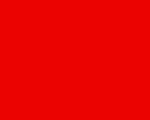

In [0]:
calendar

In [0]:
calendar.crop((0,0,20,100))

(0, 0, 150, 120)
(0, 120, 150, 0)


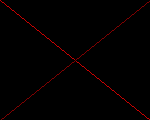

In [0]:
from PIL import Image, ImageDraw

im = Image.new("RGB", (150,120))
draw = ImageDraw.Draw(im)
draw.line((0, 0) + im.size, fill=200)
print((0, 0) + im.size)
draw.line((0, im.size[1], im.size[0], 0), fill=128)
print((0, im.size[1], im.size[0], 0))
# write to stdout
# im.save(sys.stdout, "PNG")

im

--- 
type 및 shift+tab 을 이용한 검사 연습

In [0]:
type(im)

PIL.Image.Image

In [0]:
type(draw)

PIL.ImageDraw.ImageDraw

In [0]:
type(ImageDraw.ImageDraw)   # 클래스

type

In [0]:
type(Image)  # 모듈

module

In [0]:
type(Image.new)

function

In [0]:
type(ImageDraw.ImageDraw.bitmap)

function

In [0]:
imd = ImageDraw.ImageDraw(im)

In [0]:
imd

In [0]:
vars(im)        # 인스턴스의 값 확인

{'im': <ImagingCore at 0x7fea1e5104b0>,
 'mode': 'RGB',
 '_size': (150, 120),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None,
 'encoderinfo': {},
 'encoderconfig': (False, -1, -1, b'')}

In [0]:
im.size

(150, 120)

---

## 상속 실습

In [0]:
class ImageDraw:
    def line(self, x):
        self.x = x
        print('line')
        print(x)

In [0]:
a = ImageDraw()

In [0]:
a.line(15)

line
15


In [0]:
class ImageDraw2(ImageDraw):
    def line(self, y):
        self.y = y
        super().line(4)  ## 부모의 기능을 사용함
        print(y)

In [0]:
b = ImageDraw2()

In [0]:
b.line(11)

line
4
11


In [0]:
b.y

11

In [0]:
b.x

4

In [0]:
a.x

15

---

In [0]:
class A:
    x=1
class B(A):
    pass

In [0]:
A.x is B.x       # B에 없으면 부모값 참조 (복사가 아닌 부모의 값 참조)

True

In [0]:
A.x=2             # 부모 변경
A.x is B.x

True

In [0]:
B.x=3             # 자식 변경  (자식 프로퍼티 생성됨)
A.x is B.x

False

In [0]:
A.x=3             # 부모도 변경 시  
A.x is B.x        # True인 이유: python 에서는 256 까지는 숫자를 메모리 공유함

True

---

In [0]:
a = A()
b = B()

In [0]:
type(a)      # 내부적으로 __class__를 호출함

__main__.A

In [0]:
a.__class__  # type과 같음

__main__.A

In [0]:
A.__base__   # 부모를 확인 (클래스에서만 사용)

object

In [0]:
B.__base__

__main__.A

In [0]:
issubclass(B,A)

True

In [0]:
B.__mro__    # 상속에 따른 클래스의 실행 순서를 출력

(__main__.B, __main__.A, object)

In [0]:
정리
__init__      
__class__      
__dir__      
__base__  / issubclass       
__bases__       
__dict__  / vart          

---
type을 이용한 클래스 정의     
(type 도움말을 보면 new type을 지원)

In [0]:
int2 = type('int2',(int,),{})   # 아래와 같음
# class int2(int)음
#    pass

In [0]:
int2(4)

4

---
다중상속



In [0]:
class A:
    def __init__(self):
        print('A')
        
class B(A):
    def __init__(self):
        super().__init__()
        print('B')
        
class C(A):
    def __init__(self):
        super().__init__()
        print('C')
        
## 다중상속
class D(B,C):
    def __init__(self):
        #B.__init__(self)        # A가 두번 불림
        #C.__init__(self)
        super().__init__()       # A가 한번 불림
        print('D')

In [0]:
d = D()

A
C
B
D


부모 생성자 및 메소드 호출에 문제가 많음
,,다중 상속은 가능하면 피해라

---
### 상속 vs 컴포지션(composition) 방식

In [0]:
class Door:
    colour = 'brown'

    def __init__(self, number, status):
        self.number = number
        self.status = status

    @classmethod
    def knock(cls):
        print("Knock!")

    @classmethod
    def paint(cls, colour):
        cls.colour = colour

    def open(self):
        self.status = 'open'
        
    def close(self):
        self.status = 'closed'
        
class SecurityDoor(Door):
    pass

In [0]:
sdoor = SecurityDoor(1, 'closed')

In [0]:
print(SecurityDoor.colour is Door.colour)

True


In [0]:
# 고전적인 composition

In [0]:
class SecurityDoor:
    colour = 'gray'
    locked = True
    
    def __init__(self, number, status):
        self.door = Door(number, status)
        
    def open(self):
        if self.locked:
            return
        self.door.open()
        
    def close(self):
        self.door.close()

In [0]:
# ,,, 내일 진행